<a href="https://colab.research.google.com/github/Rishabh8827/Machine-Learning---Summer-Training/blob/main/Day%208/Transfer_Learning_Using_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Datasets/dataset/train'
valid_path = '/content/gdrive/MyDrive/Datasets/dataset/val'

In [ ]:
# add preprocessing layer to the front of VGG
mn = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False, classes=5)

# don't train existing weights
for layer in mn.layers:
  layer.trainable = False
  


In [ ]:
 # useful for getting number of classes
folders = glob('/content/gdrive/MyDrive/Datasets/dataset/train/*')
folders

['/content/gdrive/MyDrive/Datasets/dataset/train/ben_afflek',
 '/content/gdrive/MyDrive/Datasets/dataset/train/elton_john',
 '/content/gdrive/MyDrive/Datasets/dataset/train/jerry_seinfeld',
 '/content/gdrive/MyDrive/Datasets/dataset/train/madonna',
 '/content/gdrive/MyDrive/Datasets/dataset/train/mindy_kaling']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mn.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
prediction = Dense(5, activation='softmax')(prediction)

In [ ]:
# create a model object
model = Model(inputs=mn.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Datasets/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Datasets/dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

Found 93 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

In [ ]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
3/3 [==============================] - 5s 2s/step - loss: 1.6164 - accuracy: 0.2151 - val_loss: 1.6195 - val_accuracy: 0.2000
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 1.5366 - accuracy: 0.3226 - val_loss: 1.5901 - val_accuracy: 0.2800
Epoch 3/50
3/3 [==============================] - 5s 2s/step - loss: 1.4839 - accuracy: 0.3656 - val_loss: 1.4807 - val_accuracy: 0.3600
Epoch 4/50
3/3 [==============================] - 5s 2s/step - loss: 1.4907 - accuracy: 0.4086 - val_loss: 1.5125 - val_accuracy: 0.3600
Epoch 5/50
3/3 [==============================] - 5s 2s/step - loss: 1.4749 - accuracy: 0.4194 - val_loss: 1.6122 - val_accuracy: 0.2800
Epoch 6/50
3/3 [==============================] - 7s 2s/step - loss: 1.4829 - accuracy: 0.3871 - val_loss: 1.5567 - val_accuracy: 0.3200
Epoch 7/50
3/3 [==============================] - 5s 2s/step - loss: 1.4690 - accuracy: 0.4086 - val_loss: 1.5615 - val_accuracy: 0.3200
Epoch 8/50
3/3 [=========================

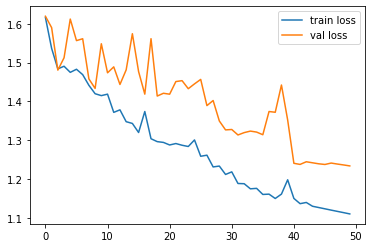

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

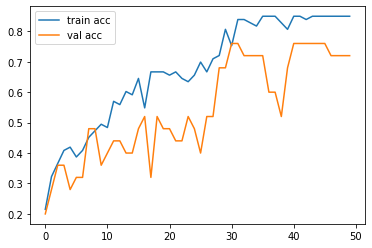

<Figure size 432x288 with 0 Axes>

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')